<a href="https://colab.research.google.com/github/amtapia/ROOT/blob/main/PyROOT_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos con PyROOT en Google Colab

**Creado por:** Alex Tapia, Universidad de Medellín

**email:** atapia@udemedellin.edu.co

En este notebook trabajaremos con el framework **ROOT** (desarrollado por el CERN) desde Colab y **Python** usando **PyROOT**. El flujo general será:

1. Verificar la versión de Ubuntu en Google Colab.
2. Instalar ROOT
3. Configurar variables de entorno para ROOT
4. Probar PyROOT con un histograma sencillo.
5. Crear y guardar un `TTree` en un archivo `.root`.
6. Leer el `TTree` y generar histogramas.
7. Usar `RDataFrame` para análisis de estilo tipo "Python".
8. Realizar un ajuste (fit) gaussiano sencillo.
9. (Opcional) Ver un esqueleto de uso de TMVA.

## 1. Verificar la versión de Ubuntu

Esta celda permite verificar qué versión de Ubuntu está ejecutando el entorno de Colab. Esto es útil para escoger el binario adecuado de ROOT.

In [2]:
# Ver información básica del sistema operativo
!lsb_release -a || echo "lsb_release no disponible"

print("\nContenido de /etc/os-release:\n")
!cat /etc/os-release

print("\nInformación de kernel y arquitectura:\n")
!uname -a


No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy

Contenido de /etc/os-release:

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy

Información de kernel y arquitectura:

Linux 003672c7155d 6.6.105+ #1 SMP Thu Oct  2 10:42:05 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


## 2. Instalación de ROOT

En esta celda descargamos e instalamos una versión precompilada de ROOT para Ubuntu 22.04 (ajusta el enlace si en el futuro cambia la versión de Colab o ROOT).

> **Nota:** Esta celda puede tardar algunos minutos en ejecutarse.

In [2]:
%%bash
set -e

# Ir a /content
cd /content

# Descargar ROOT precompilado para Ubuntu 22 (ajustable si cambia la versión)
wget -q https://root.cern/download/root_v6.30.06.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz

# Descomprimir
tar -xf root_v6.30.06.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz

# Mostrar contenido para verificar
ls -d /content/root*

/content/root
/content/root_v6.30.06.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz


## 3. Configurar variables de entorno para ROOT

En esta celda se configuran las variables de entorno necesarias para que `import ROOT` funcione correctamente en Python.

> Ejecuta esta celda al menos una vez por sesión antes de usar PyROOT.

In [3]:
import os

root_dir = "/content/root"  # Ajusta si cambias la ruta o versión

os.environ["ROOTSYS"] = root_dir
os.environ["PATH"] = root_dir + "/bin:" + os.environ.get("PATH", "")
os.environ["LD_LIBRARY_PATH"] = root_dir + "/lib:" + os.environ.get("LD_LIBRARY_PATH", "")
os.environ["PYTHONPATH"] = root_dir + "/lib:" + os.environ.get("PYTHONPATH", "")

print("ROOTSYS  =", os.environ["ROOTSYS"])
print("PATH    (inicio) =", os.environ["PATH"].split(":")[0])

ROOTSYS  = /content/root
PATH    (inicio) = /content/root/bin


In [4]:
!echo $PYTHONPATH

/content/root/lib:/env/python


In [5]:
!echo $ROOTSYS

/content/root


## 4. Probar que PyROOT funciona

En esta sección:

- Importamos ROOT desde Python.
- Creamos un histograma de prueba.
- Lo llenamos con números gaussianos aleatorios.
- Lo dibujamos en un `TCanvas`.

In [6]:
!root

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/06                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Apr 03 2024, 10:42:17                 |
  | From tags/v6.30.06-0-g4f4e716372@v6.30.06-0-g4f4e716372          |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------

.q


In [10]:
!python3.10

Python 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import ROOT
>>> quit
Use quit() or Ctrl-D (i.e. EOF) to exit
>>> quit()


In [7]:
%%bash

source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'
import ROOT
print("Versión de ROOT:", ROOT.gROOT.GetVersion())
EOF

Versión de ROOT: 6.30/06


In [12]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'
import ROOT

print("Versión de ROOT:", ROOT.gROOT.GetVersion())

# Crear un histograma sencillo
h = ROOT.TH1F("h", "Ejemplo gaussiano; x; Eventos", 50, -3, 3)

# Llenar con números aleatorios gaussianos
for i in range(20000):
    h.Fill(ROOT.gRandom.Gaus())

# Dibujar en un canvas
c = ROOT.TCanvas("c", "Canvas de prueba", 800, 600)
h.Draw()

c.Draw()
# Save the canvas to a file to display it in Colab
c.SaveAs("histogram.png")
EOF

Versión de ROOT: 6.30/06


Info in <TCanvas::Print>: png file histogram.png has been created


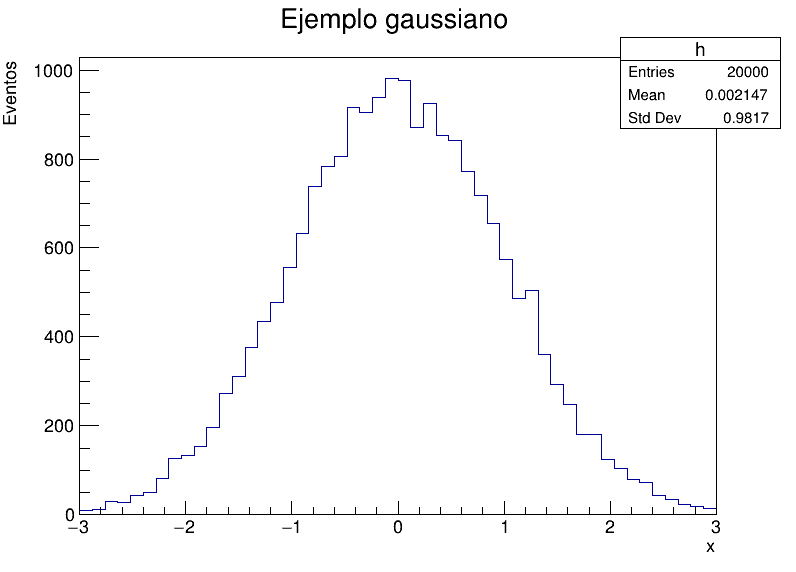

In [13]:
from IPython.display import Image
Image('histogram.png')

## 5. Crear un `TTree` y guardar un archivo ROOT

Aquí:

- Creamos un archivo `datos_ejemplo.root`.
- Definimos un `TTree` llamado `arbol`.
- Añadimos ramas para energía, carga y un ID de evento.
- Llenamos el árbol con datos simulados.

In [14]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'

import ROOT
from array import array
import math
import random

# Crear archivo ROOT
f_out = ROOT.TFile("datos_ejemplo.root", "RECREATE")

# Crear TTree
tree = ROOT.TTree("arbol", "TTree de ejemplo")

# Variables (por referencia) que irán en las ramas
energy = array('f', [0.])
charge = array('f', [0.])
event_id = array('i', [0])

tree.Branch("energy", energy, "energy/F")
tree.Branch("charge", charge, "charge/F")
tree.Branch("event_id", event_id, "event_id/I")

# Llenar el árbol con datos sintéticos
n_events = 10000
for i in range(n_events):
    event_id[0] = i
    # Distribución de energía: gaussiana centrada en 50 con sigma=10
    energy[0] = random.gauss(50, 10)
    # Distribución de carga: correlacionada con energía
    charge[0] = energy[0] * 0.2 + random.gauss(0, 2)
    tree.Fill()

# Escribir y cerrar archivo
tree.Write()
f_out.Close()

print("Archivo ROOT creado: datos_ejemplo.root, con TTree 'arbol'.")
EOF

Archivo ROOT creado: datos_ejemplo.root, con TTree 'arbol'.


## 6. Leer el `TTree` y generar histogramas

En esta sección:

- Abrimos el archivo `datos_ejemplo.root`.
- Leemos el `TTree` llamado `arbol`.
- Creamos histogramas para energía y carga.
- Recorremos el árbol para llenar los histogramas.

In [39]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'

import ROOT

# Abrir archivo
f_in = ROOT.TFile("datos_ejemplo.root", "READ")
tree = f_in.Get("arbol")

print("Número de entradas en el árbol:", tree.GetEntries())

# Crear histogramas
hE = ROOT.TH1F("hE", "Distribucion de energia; E [unidades]; Eventos", 50, 0, 100)
hQ = ROOT.TH1F("hQ", "Distribucion de carga; Q [unidades]; Eventos", 50, -20, 40)

# Llenar histogramas recorriendo el árbol
for entry in tree:
    hE.Fill(entry.energy)
    hQ.Fill(entry.charge)

# Mostrar
c1 = ROOT.TCanvas("c1", "Energia y carga", 800, 400)
c1.Divide(2, 1)

c1.cd(1)
hE.Draw()

c1.cd(2)
hQ.Draw()

c1.Draw()

# Save the canvas to a file to display it in Colab
c1.SaveAs("histogram_2.png")
EOF

Número de entradas en el árbol: 10000


Info in <TCanvas::Print>: png file histogram_2.png has been created


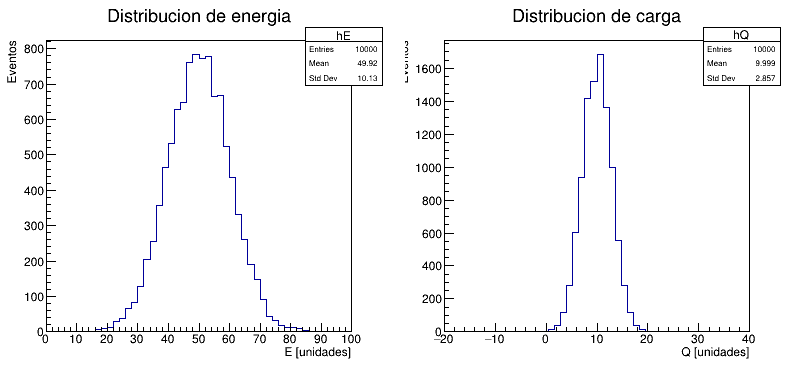

In [40]:
from IPython.display import Image
Image('histogram_2.png')

## 7. Uso de `RDataFrame`

`RDataFrame` es la interfaz de alto nivel de ROOT para análisis de datos, muy conveniente y cercana al estilo de Pandas.

Aquí:

- Creamos un `RDataFrame` a partir del `TTree`.
- Mostramos las primeras filas.
- Aplicamos un corte en energía.
- Construimos un histograma filtrado.

In [43]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'

import ROOT

# Crear RDataFrame desde el TTree
df = ROOT.RDataFrame("arbol", "datos_ejemplo.root")

# Tomar un rango de filas para mostrar (primeras 10)
df_head = df.Range(10)

print("Primeras 10 filas:")
df_head.Display().Print()

# Definir un corte en energía > 40
df_cut = df.Filter("energy > 40", "Corte en energia")

# Crear un histograma de energía para los eventos con E > 40
hE_cut = df_cut.Histo1D(
    ("hE_cut", "Energia con E > 40; E [unidades]; Eventos", 50, 0, 100),
    "energy"
)

c2 = ROOT.TCanvas("c2", "RDataFrame example", 800, 600)
hE_cut.Draw()
c2.Draw()

# Save the canvas to a file to display it in Colab
c2.SaveAs("rdataFrame.png")
EOF

+-----+----------+----------+----------+
| Row | charge   | energy   | event_id | 
+-----+----------+----------+----------+
| 0   | 7.67349f | 40.1623f | 0        | 
+-----+----------+----------+----------+
| 1   | 10.2599f | 48.3485f | 1        | 
+-----+----------+----------+----------+
| 2   | 10.7262f | 52.5540f | 2        | 
+-----+----------+----------+----------+
| 3   | 6.27391f | 33.0983f | 3        | 
+-----+----------+----------+----------+
| 4   | 8.75638f | 53.4124f | 4        | 
+-----+----------+----------+----------+
Primeras 10 filas:


Info in <TCanvas::Print>: png file rdataFrame.png has been created


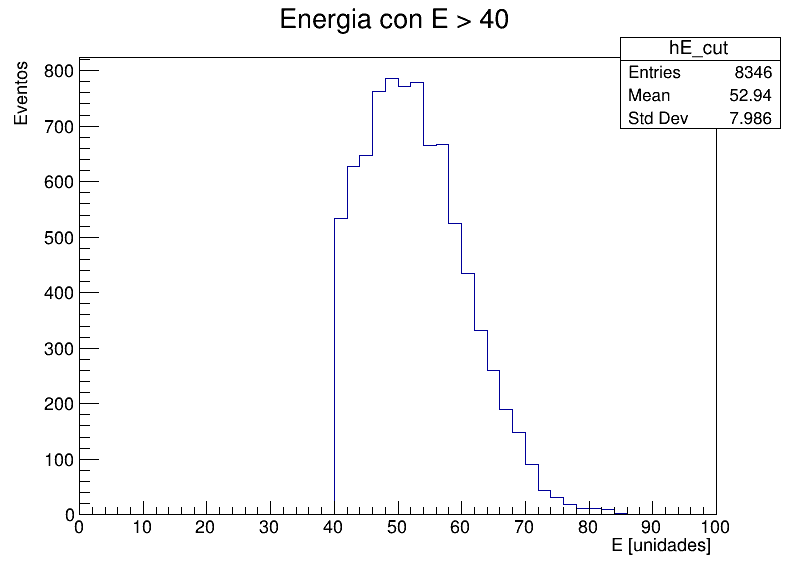

In [44]:
from IPython.display import Image
Image('rdataFrame.png')

## 8. Ajuste (fit) gaussiano sencillo

En esta sección:

- Construimos un histograma de energía desde el `TTree`.
- Definimos una función gaussiana.
- Realizamos un ajuste (fit) sobre el histograma.
- Imprimimos los parámetros obtenidos (media y sigma).

In [19]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'
import ROOT

# Abrir archivo y obtener árbol
f_in = ROOT.TFile("datos_ejemplo.root", "READ")
tree = f_in.Get("arbol")

# Crear histograma para el fit
hE_fit = ROOT.TH1F("hE_fit", "Energia; E [unidades]; Eventos", 50, 0, 100)
tree.Draw("energy >> hE_fit")

# Definir función gaussiana
gaus = ROOT.TF1("gaus", "gaus", 0, 100)

# Ajustar histograma (opción 'S' para obtener TFitResultPtr)
fit_result = hE_fit.Fit(gaus, "S")

mean = gaus.GetParameter(1)
sigma = gaus.GetParameter(2)

print("Resultado del fit gaussiano:")
print(f"  media (mean)  = {mean:.3f}")
print(f"  sigma         = {sigma:.3f}")

c3 = ROOT.TCanvas("c3", "Fit gaussiano", 800, 600)
hE_fit.Draw()
gaus.SetLineWidth(2)
gaus.Draw("SAME")
c3.Draw()

# Save the canvas to a file to display it in Colab
c3.SaveAs("fit.png")
EOF

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      34.1017
NDf                       =           36
Edm                       =   7.8634e-06
NCalls                    =           56
Constant                  =      788.163   +/-   9.7124      
Mean                      =      49.9144   +/-   0.101237    
Sigma                     =      10.0908   +/-   0.0726184    	 (limited)
Resultado del fit gaussiano:
  media (mean)  = 49.914
  sigma         = 10.091


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: png file fit.png has been created


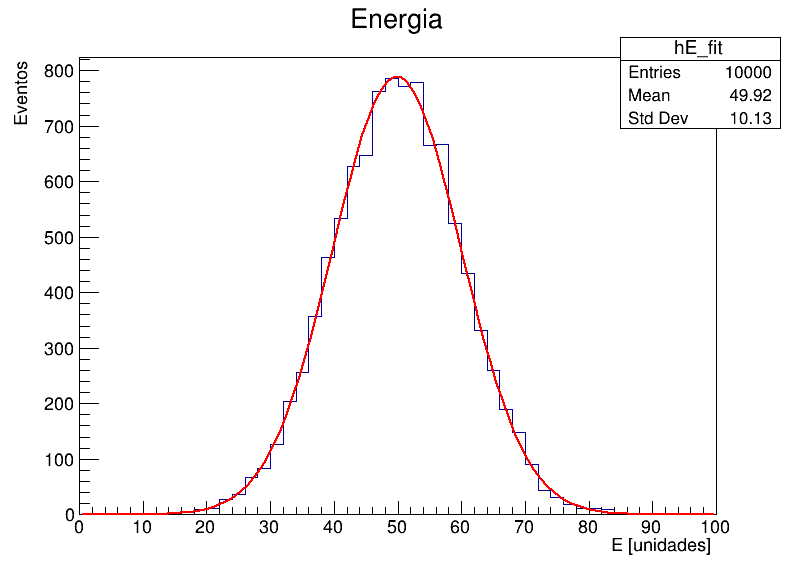

In [20]:
from IPython.display import Image
Image('fit.png')

## 9. (Opcional) Esqueleto de uso de TMVA

TMVA es el **Toolkit for Multivariate Analysis** de ROOT. Aquí se muestra un esqueleto básico de configuración.

> **Advertencia:** Entrenar métodos multivariados puede ser costoso en tiempo y memoria, pero este ejemplo sirve como plantilla mínima.

In [30]:
%%bash
source /content/root/bin/thisroot.sh
python3.10 - << 'EOF'

import ROOT

# Habilitar TMVA
ROOT.TMVA.Tools.Instance()

output_tmva = ROOT.TFile("TMVA_output.root", "RECREATE")

factory = ROOT.TMVA.Factory(
    "TMVAClassification",          # nombre
    output_tmva,                   # archivo de salida
    "!V:!Silent:Color:DrawProgressBar:AnalysisType=Classification"
)

data_file = ROOT.TFile("datos_ejemplo.root")
tree = data_file.Get("arbol")

dataloader = ROOT.TMVA.DataLoader("dataset")

# Variables de entrada
dataloader.AddVariable("energy", "energy", "units", "F")
dataloader.AddVariable("charge", "charge", "units", "F")

# Definir árbol de señal y fondo (usamos el MISMO árbol, pero con cortes distintos)
dataloader.AddSignalTree(tree,     1.0)   # peso 1.0
dataloader.AddBackgroundTree(tree, 1.0)

# Definir los cortes que separan S y B
sigCut = ROOT.TCut("energy > 50")
bkgCut = ROOT.TCut("energy <= 50")

# Preparar muestras de entrenamiento y prueba
dataloader.PrepareTrainingAndTestTree(
    sigCut,
    bkgCut,
    "SplitMode=Random:NormMode=NumEvents:!V"
)

# Configurar método BDT (ahora SÍ hay 2 clases)
factory.BookMethod(
    dataloader,
    ROOT.TMVA.Types.kBDT,
    "BDT",
    "!H:!V:NTrees=100:MaxDepth=3"
)

# Entrenar, probar, evaluar
factory.TrainAllMethods()
factory.TestAllMethods()
factory.EvaluateAllMethods()

output_tmva.Close()
print("TMVA terminado sin errores.")

EOF

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree arbol of type Signal with 10000 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree arbol of type Background with 10000 events
Factory                  : Booking method: BDT
                         : 
                         : Rebuilding Dataset dataset
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree arbol
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree arbol
DataSetFactory           : [dataset] : Number of events in input trees
                         : Dataset[dataset] :     Signal     requirement: "energy > 50"
                         : Dataset[dataset] :     Signal          -- number of events passed: 4991   / sum of weights: 4991 
 

1%, time left: unknown
8%, time left: 0 sec
14%, time left: 0 sec
20%, time left: 0 sec
26%, time left: 0 sec
33%, time left: 0 sec
39%, time left: 0 sec
45%, time left: 0 sec
51%, time left: 0 sec
58%, time left: 0 sec
64%, time left: 0 sec
70%, time left: 0 sec
76%, time left: 0 sec
83%, time left: 0 sec
89%, time left: 0 sec
95%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
31%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
62%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
81%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
31%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
62%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
81%, time 